In [1]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np

from scipy import stats

sys.path.append('/home/hpham/code')

# Load the config.yaml to get all the directories
from waterchange.config import read_config
from waterchange.datasets import setup_directory
config = read_config()
input_data = setup_directory(config)

Loading /home/hpham/code/waterchange/config/../config.yaml.
Config loaded successfully.
Getting sorted paths to pixel data points.
Processing folder: /home/hpham/data/geo/h016v012/TSFitLine
Folder pattern: record_change_r*.mat
Sort key: [-9, -4]
Found 2000 files
First and last directory in this folder                      
 /home/hpham/data/geo/h016v012/TSFitLine/record_change_r00001.mat                      
 /home/hpham/data/geo/h016v012/TSFitLine/record_change_r02000.mat
Processing folder: /home/hpham/data/geo/h016v012/TSFitLine_1
Folder pattern: record_change_r*.mat
Sort key: [-9, -4]
Found 3000 files
First and last directory in this folder                      
 /home/hpham/data/geo/h016v012/TSFitLine_1/record_change_r02001.mat                      
 /home/hpham/data/geo/h016v012/TSFitLine_1/record_change_r05000.mat
Found 5000 in COMBINED folder.
First and last directory in COMBINED folders                 
 /home/hpham/data/geo/h016v012/TSFitLine/record_change_r00001.mat         

/home/hpham/.local/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
Train: [1, 6, 10, 11, 12, 13], test: 0
Training:
Overall Accuracy: 0.958210158559527 - Details: [0.9738454288407163, 0.9374609130706691]
Inference:
Overall Accuracy: 0.7582990397805213 - Details: [0.7258230452674898, 0.7954144620811288]


KeyboardInterrupt: 

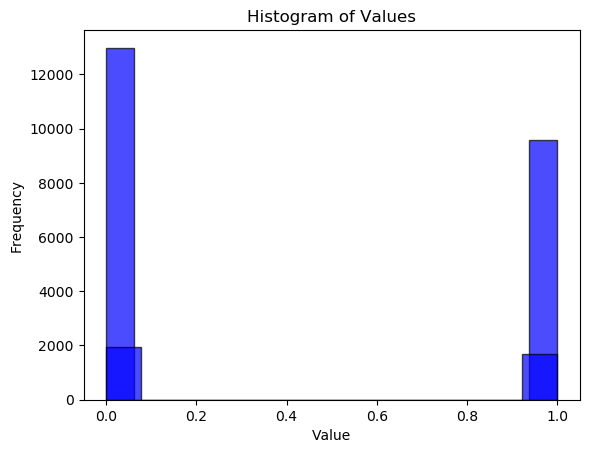

In [2]:
from waterchange.utils import get_logger
from waterchange.models import predict_average_water_index_all_pixels_from_first_coefs_all_bands
from waterchange.models import acc_stat, cal_p_value

logger = get_logger("INFO")
res1_train = []
res1_infer = []
for index in input_data.rois:
    infer_region_id = index
    train_region_id = [x for x in input_data.rois if x != infer_region_id]
    logger.info(f"Train: {train_region_id}, test: {infer_region_id}")

    df_infer, train_acc, infer_acc = predict_average_water_index_all_pixels_from_first_coefs_all_bands(
        input_data,
        sub_dir_in_train="water_coefs_in_period",
        sub_dir_in_infer_first_all="first_coefs_all_pixels_to_df",
        sub_dir_in_infer_in_period="water_coefs_in_period",
        train_region_id=train_region_id,
        infer_region_id=infer_region_id)
    res1_train.append(train_acc)
    res1_infer.append(infer_acc)

acc_stat(res1_train)
acc_stat(res1_infer)


Train: [1, 6, 10, 11, 12, 13], test: 0


Training:
Overall Accuracy: 0.9137328675087342 - Details: [0.969383354894351, 0.3485915492957746, 0.9418604651162791]
Inference:
Overall Accuracy: 0.6093278463648834 - Details: [0.8405935854475826, 0.15, 0.4827586206896552]
Train: [0, 6, 10, 11, 12, 13], test: 1
Training:
Overall Accuracy: 0.8491370125719157 - Details: [0.9484022280856054, 0.3867924528301887, 0.7801857585139319]
Inference:
Overall Accuracy: 0.6336005344021376 - Details: [0.9785342948180447, 0.08701657458563536, 0.31953110228776704]
Train: [0, 1, 10, 11, 12, 13], test: 6
Training:
Overall Accuracy: 0.8742412245975192 - Details: [0.9531179901301032, 0.24802110817941952, 0.9263336155800169]
Inference:
Overall Accuracy: 0.8521497061552737 - Details: [0.9417970170971263, 0.23218997361477572, 0.7428571428571429]
Train: [0, 1, 6, 11, 12, 13], test: 10
Training:
Overall Accuracy: 0.8790072388831437 - Details: [0.9619952494061758, 0.23901808785529716, 0.9266409266409267]
Inference:
Overall Accuracy: 0.8399274047186933 - Details

Overall: 0.88 ± 0.02
Class 0: 0.96 ± 0.01
Class 1: 0.30 ± 0.05
Class 2: 0.91 ± 0.05
Overall: 0.80 ± 0.13
Class 0: 0.95 ± 0.05
Class 1: 0.14 ± 0.05
Class 2: 0.52 ± 0.26


(array([0.79612918, 0.95119443, 0.13665495, 0.52190276]),
 (array([0.66286005, 0.90389717, 0.08543611, 0.2641759 ]),
  array([0.92939831, 0.99849169, 0.18787379, 0.77962962])))

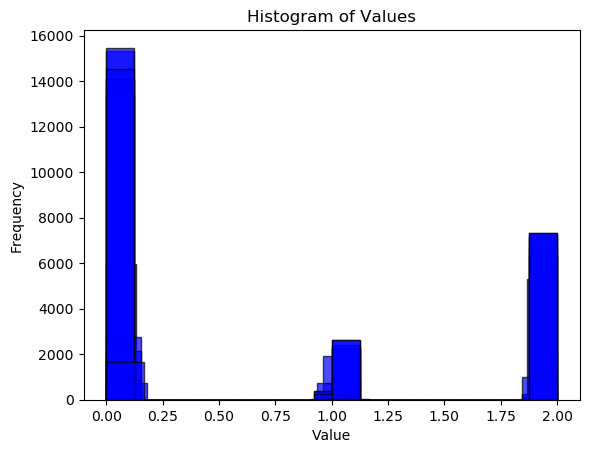

In [21]:
from waterchange.utils import get_logger
from waterchange.models import predict_average_water_index_all_pixels_from_first_coefs_bands

band1 = 2
band2 = 4
logger = get_logger("INFO")
res2_train = []
res2_infer = []

for index in input_data.rois:
    infer_region_id = index
    train_region_id = [x for x in input_data.rois if x != infer_region_id]
    logger.info(f"Train: {train_region_id}, test: {infer_region_id}")

    df_infer, train_acc, infer_acc = predict_average_water_index_all_pixels_from_first_coefs_bands(
        input_data,
        sub_dir_in_train="water_coefs_in_period",
        sub_dir_in_infer_first_all="first_coefs_all_pixels_to_df",
        sub_dir_in_infer_in_period="water_coefs_in_period",
        train_region_id=train_region_id,
        infer_region_id=infer_region_id,
        band1=band1, band2=band2)
    
    res2_train.append(train_acc)
    res2_infer.append(infer_acc)

acc_stat(res2_train)
acc_stat(res2_infer)


In [5]:
from waterchange.models import cal_p_value
cal_p_value(list(res1), list(res2))

t-statistic: 1.0429, p-value: 0.3175
The means are not significantly different (p >= 0.05).


Train: [0, 1, 10, 11, 12, 13], test: 6


0, (0.0, 0.3)
1, (0.3, 1.0)
class
0.0    12476
1.0    10486
Name: count, dtype: int64
Table key: [(0.0, 0.3)], Value: 54.33
Table key: [(0.3, 1.0)], Value: 45.67
{0.0, 1.0}
Number of class: 2
New labels to old labels:
{0.0: 0.0, 1.0: 1.0}
Training:
[(0.0, 0.3)] Accuracy: 0.95
[(0.3, 1.0)] Accuracy: 0.922
Confusion Matrix:
[[3932  205]
 [ 268 3173]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4137
           1       0.94      0.92      0.93      3441

    accuracy                           0.94      7578
   macro avg       0.94      0.94      0.94      7578
weighted avg       0.94      0.94      0.94      7578

Overall Accuracy: 0.9375824755872262 - Details: [0.950447183949722, 0.922115664051148]
Inference:
0, (0.0, 0.3)
1, (0.3, 1.0)
class
0.0    2450
1.0     783
Name: count, dtype: int64
Table key: [(0.0, 0.3)], Value: 75.78
Table key: [(0.3, 1.0)], Value: 24.22
{0.0, 1.0}
Number of class: 2
New labels to old labels:
{0.0: 0.

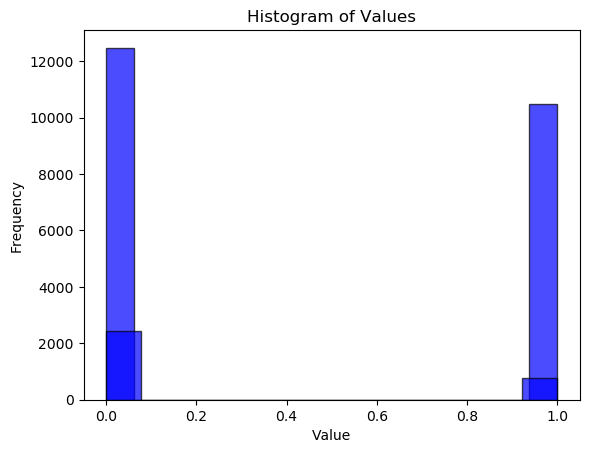

In [5]:
from waterchange.utils import get_logger
from waterchange.models import predict_average_water_index_all_pixels_from_first_coefs_all_bands
logger = get_logger("Debug")
infer_region_id = 6
train_region_id = [x for x in input_data.rois if x != infer_region_id]
logger.info(f"Train: {train_region_id}, test: {infer_region_id}")

df_infer, train_acc, infer_acc = predict_average_water_index_all_pixels_from_first_coefs_all_bands(
    input_data,
    sub_dir_in_train="water_coefs_in_period",
    sub_dir_in_infer_first_all="first_coefs_all_pixels_to_df",
    sub_dir_in_infer_in_period="water_coefs_in_period",
    train_region_id=train_region_id,
    infer_region_id=infer_region_id)

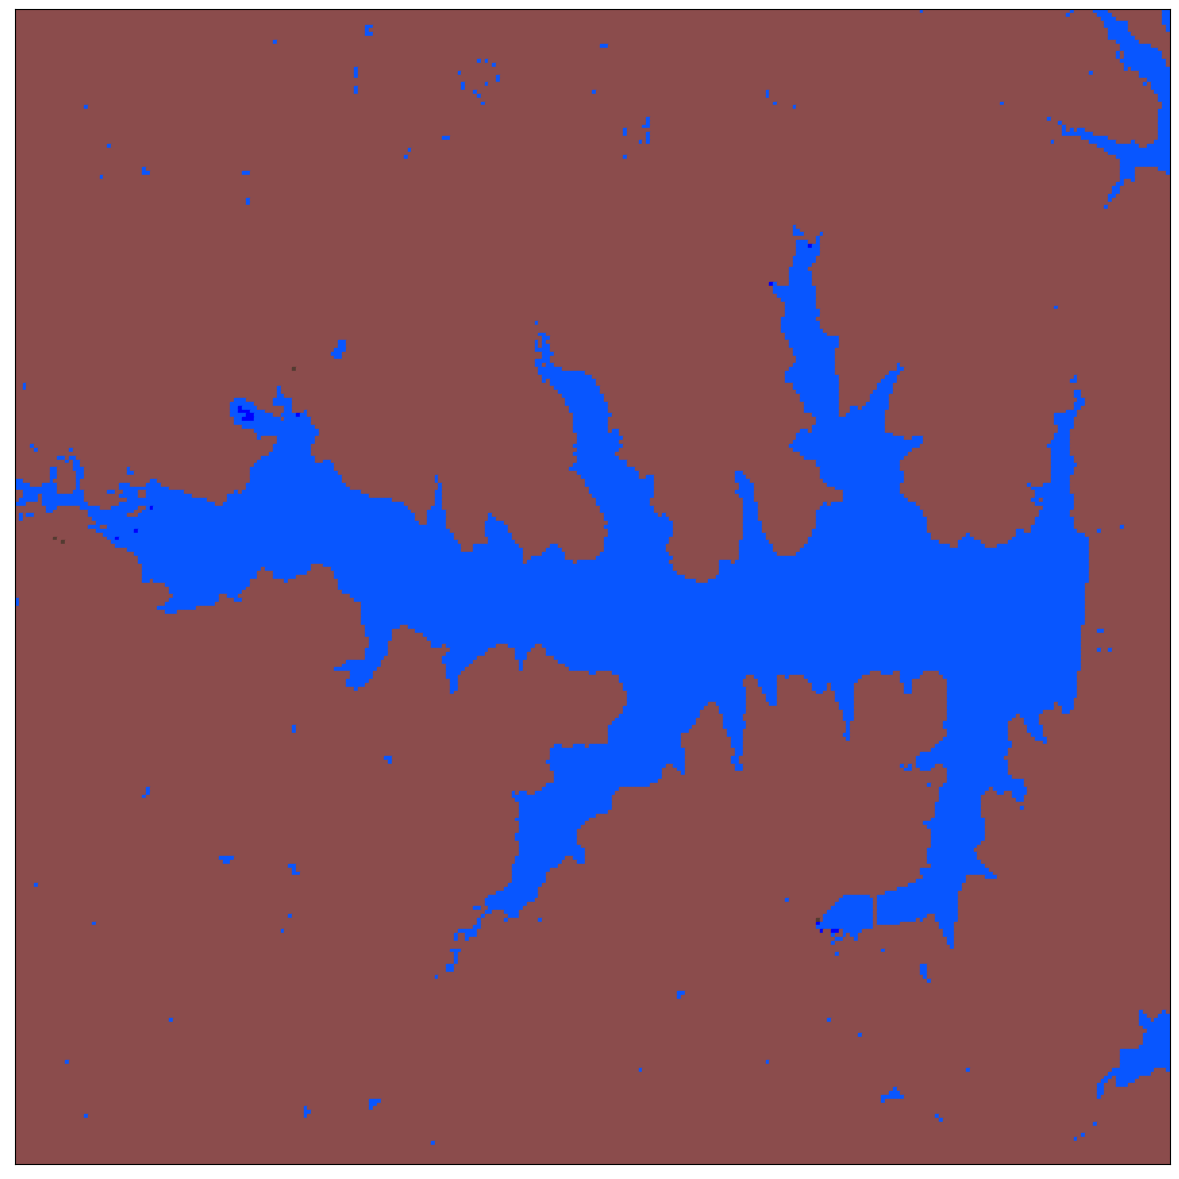

In [6]:
from waterchange.models import create_inference_map
create_inference_map(
    input_data,
    sub_dir_out="predict_index_green_white",
    region_id=infer_region_id,
    inference_df=df_infer,
    # encoded_colors = {0: '#006400', 1: 'red', 2: 'blue', 3: 'green', 4: '#FF7F7F', 5: '#0856ff'},
    # encoded_colors = {0: '#70534f', 1: 'green', 2: 'blue', 3: '#8b4c4c', 4: 'white', 5: '#0856ff'},
    encoded_colors = {0: '#533b31', 1: 'blue', 3: '#8b4c4c', 4: '#0856ff', 5: 'white', 8: 'red'},
    # empty_index=3,
    empty_index=5, # Empty pixels

    )